
# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Importing Libraries</p>

In [21]:
# os module to handle file paths and directories
import os
# OpenCV library for image processing tasks
import cv2
# Random module for generating random numbers
import random
# Pandas library for data manipulation and analysis
import pandas as pd
# Numpy library for numerical computations
import numpy as np
# Matplotlib library for data visualization
import matplotlib.pyplot as plt
# Seaborn library for statistical data visualization
import seaborn as sns
# TensorFlow library for building and training neural networks
import tensorflow as tf
#  Keras module from TensorFlow for building neural network models
from tensorflow import keras
# Layers module from Keras for defining different types of layers in a neural network
from tensorflow.keras import layers
# Sequential class from Keras for creating sequential neural network models
from tensorflow.keras.models import Sequential
# Specific layers from Keras for building the neural network architecture
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# TensorBoard callback from Keras for monitoring training progress
from tensorflow.keras.callbacks import TensorBoard
# Classification_report function from scikit-learn for evaluating classification models
from sklearn.metrics import classification_report


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Loading Data</p>

In [22]:
# Function to load and print shape of images
def print_image_shapes(image_paths):
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is not None:
            print("Image shape:", img.shape)
        else:
            print("Error: Unable to load image at path:", img_path)

# Directories for train, test, and validation data
train_directory = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train"
test_directory = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test"
validation_directory = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation"

# Load train data
train_filepath = []
train_label = []

folds_train = os.listdir(train_directory)

for fold in folds_train:
    f_path = os.path.join(train_directory, fold)
    imgs = os.listdir(f_path)
    for img in imgs:
        img_path = os.path.join(f_path, img)
        train_filepath.append(img_path)
        train_label.append(fold)

# Concatenate data paths with labels for train data
train_file_path_series = pd.Series(train_filepath, name='filepath')
train_label_path_series = pd.Series(train_label, name='label')
df_train = pd.concat([train_file_path_series, train_label_path_series], axis=1)

# Load test data
test_filepath = []
test_label = []

folds_test = os.listdir(test_directory)

for fold in folds_test:
    f_path = os.path.join(test_directory, fold)
    imgs = os.listdir(f_path)
    for img in imgs:
        img_path = os.path.join(f_path, img)
        test_filepath.append(img_path)
        test_label.append(fold)

# Concatenate data paths with labels for test data
test_file_path_series = pd.Series(test_filepath, name='filepath')
test_label_path_series = pd.Series(test_label, name='label')
df_test = pd.concat([test_file_path_series, test_label_path_series], axis=1)

# Load validation data
validation_filepath = []
validation_label = []

folds_validation = os.listdir(validation_directory)

for fold in folds_validation:
    f_path = os.path.join(validation_directory, fold)
    imgs = os.listdir(f_path)
    for img in imgs:
        img_path = os.path.join(f_path, img)
        validation_filepath.append(img_path)
        validation_label.append(fold)

# Concatenate data paths with labels for validation data
validation_file_path_series = pd.Series(validation_filepath, name='filepath')
validation_label_path_series = pd.Series(validation_label, name='label')
df_validation = pd.concat([validation_file_path_series, validation_label_path_series], axis=1)

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Preprocessing Data</p>

In [23]:
# Define rescaling layer
rescale = layers.Rescaling(1./255)

# Load train dataset with rescaling
train_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))  # Apply rescaling

# Load validation dataset with rescaling
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Validation',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)
validation_ds = validation_ds.map(lambda x, y: (rescale(x), y))  # Apply rescaling

# Load test dataset with rescaling
test_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Test',
    batch_size=32,
    image_size=(224, 224),
    label_mode='categorical',  # Assuming you have multiple classes
    shuffle=False,
)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))  # Apply rescaling

Found 10000 files belonging to 2 classes.
Using 8000 files for training.
Found 800 files belonging to 2 classes.
Using 160 files for validation.
Found 992 files belonging to 2 classes.



# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Visualizing Train Images</p>

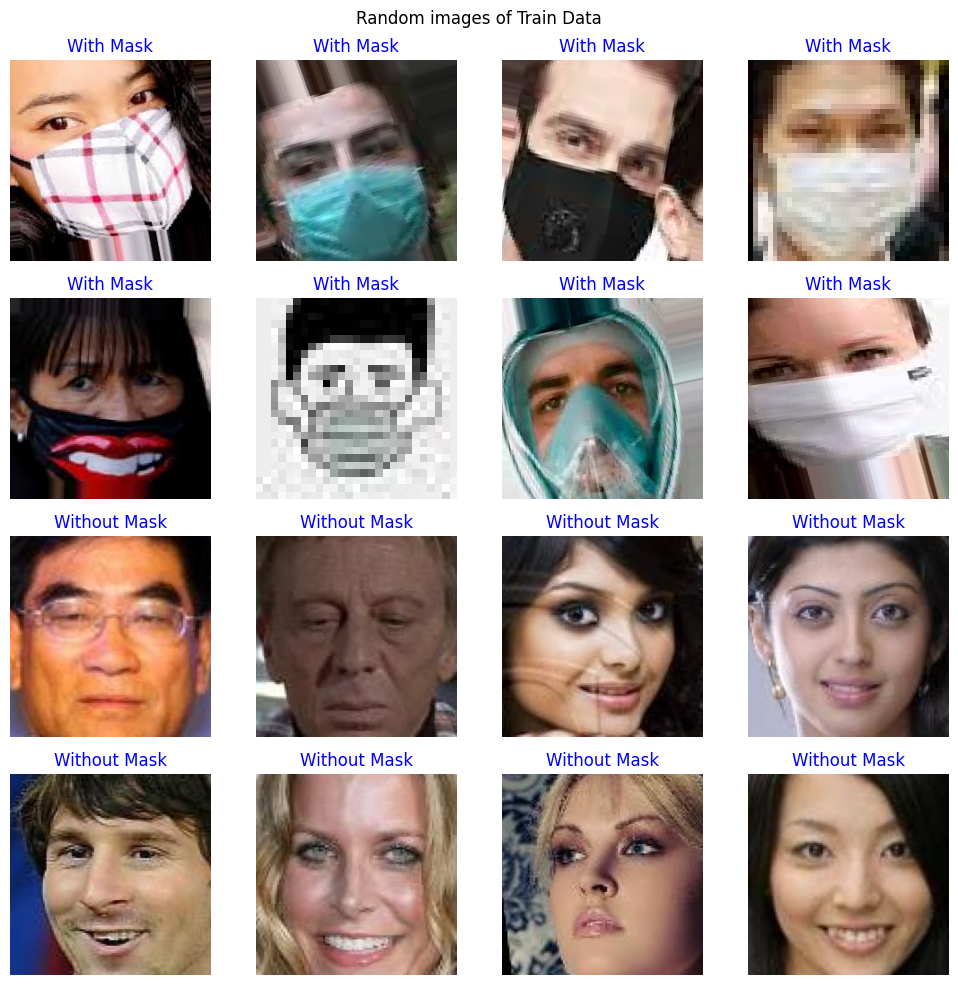

In [24]:
# Directory paths for images with mask and without mask
with_mask_path = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask"
without_mask_path = "/kaggle/input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask"

# Function to sample images from a directory
def sample_images(directory, num_samples):
    images = [os.path.join(directory, file) for file in os.listdir(directory)]
    return random.sample(images, min(num_samples, len(images)))

# Sample images from each category
with_mask_img_paths = sample_images(with_mask_path, 8)
without_mask_img_paths = sample_images(without_mask_path, 8)

# Load and display images in subplots
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through images with mask
for i, img_path in enumerate(with_mask_img_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    axes[i//4, i%4].imshow(img)
    axes[i//4, i%4].set_title("With Mask",color= 'blue')
    axes[i//4, i%4].axis('off')

# Loop through images without mask
for i, img_path in enumerate(without_mask_img_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    axes[2+i//4, i%4].imshow(img)
    axes[2+i//4, i%4].set_title("Without Mask",color='blue')
    axes[2+i//4, i%4].axis('off')

plt.suptitle('Random images of Train Data')
plt.tight_layout()
plt.show()

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Count of Train Label</p>

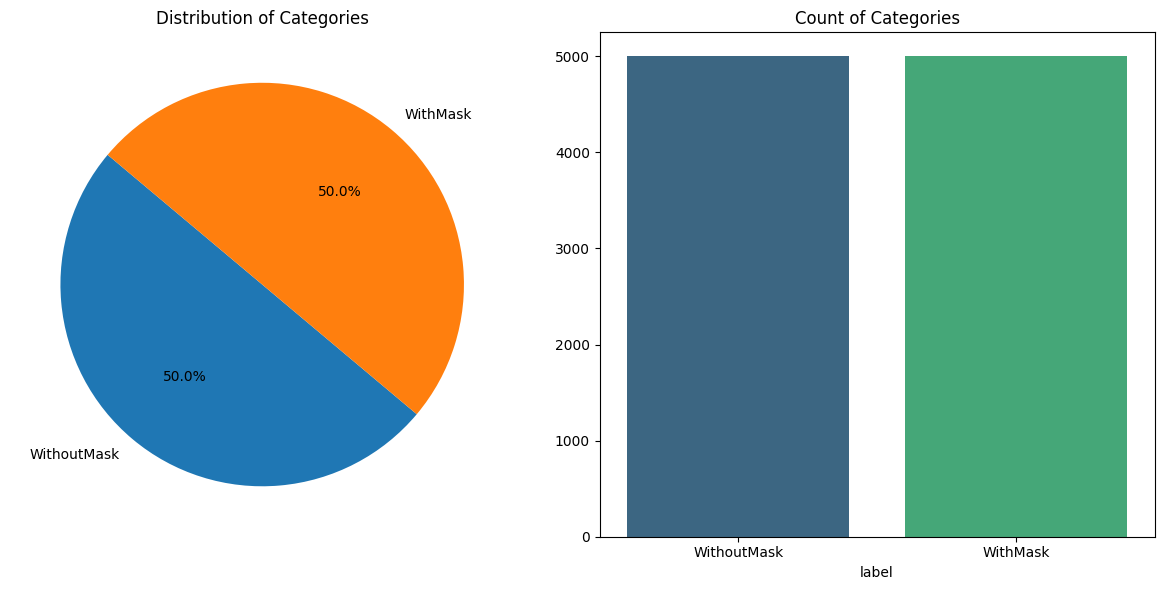

In [25]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Count of Test Label</p>


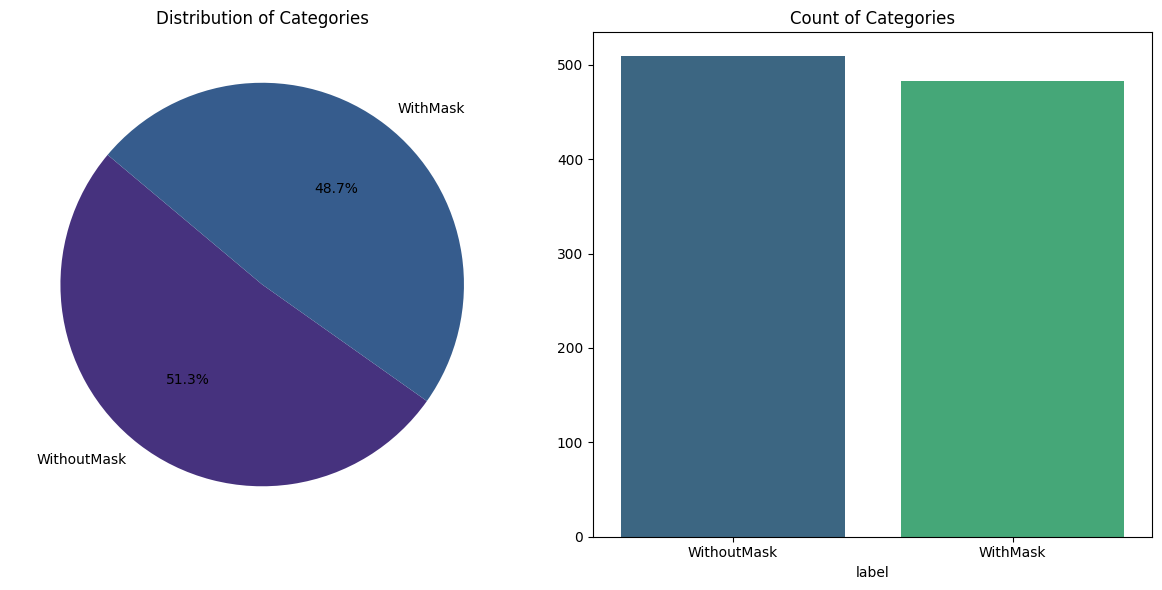

In [26]:
# Count the occurrences of each category in the 'category' column
count = df_test['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Build Model</p>

In [27]:
# Define input layer
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))

# Define model architecture
model = tf.keras.models.Sequential([
    input_layer,
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Convolutional layer with 32 filters and 3x3 kernel size, using ReLU activation
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    # Max pooling layer
    tf.keras.layers.MaxPooling2D(),
    # Flatten layer to convert 2D data to 1D
    tf.keras.layers.Flatten(),
    # Dropout Layer
    tf.keras.layers.Dropout(0.5),
    # Output layer with 1 units (for 10 classes) and softmax activation
    tf.keras.layers.Dense(2, activation='softmax'),
])


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Summary of Model</p>

In [28]:
# Display the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │        43,266 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,658 (244.76 KB)

 Trainable params: 62,658 (244.76 KB)

 Non-trainable params: 0 (0.00 B)


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Compile Model</p>

In [29]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Fit Model</p>

In [30]:
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model with callbacks
history = model.fit(train_ds,
                    validation_data=validation_ds,
                    epochs=5,
                    callbacks=[early_stopping])

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.8839 - loss: 0.2499 - val_accuracy: 0.9563 - val_loss: 0.1211
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.9691 - loss: 0.0887 - val_accuracy: 0.9750 - val_loss: 0.0798
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.9820 - loss: 0.0486 - val_accuracy: 0.9812 - val_loss: 0.0383
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.9853 - loss: 0.0357 - val_accuracy: 0.9875 - val_loss: 0.0449
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9879 - loss: 0.0294 - val_accuracy: 0.9875 - val_loss: 0.0258




# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">Evaluate Model</p>


In [31]:

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds) 

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.9667 - loss: 0.0998
Test Loss: 0.07539305090904236
Test Accuracy: 0.9778226017951965



# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:black;">History Plot</p>

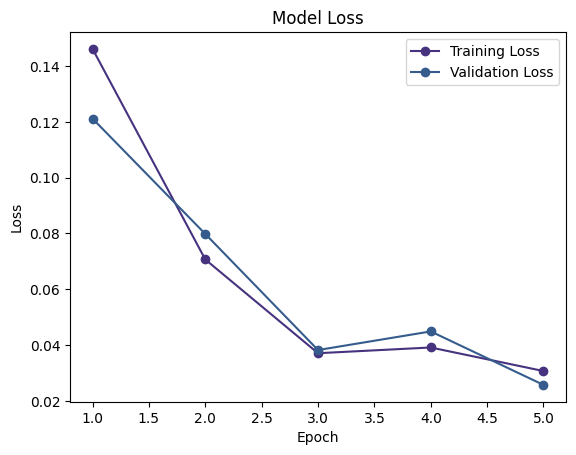

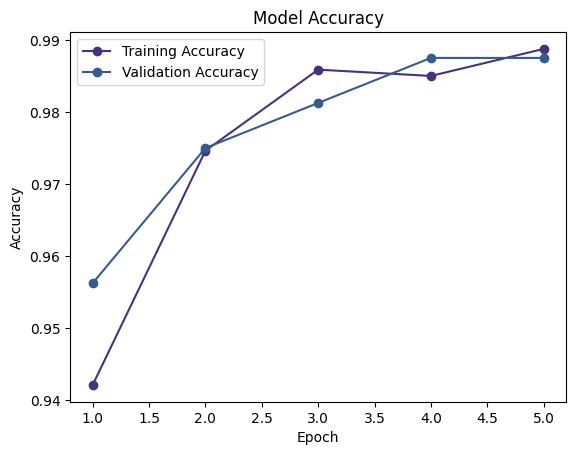

In [32]:
import matplotlib.pyplot as plt

# Define epochs
epochs = range(1, len(history.history['loss']) + 1)

# Plot training & validation loss
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()